In [107]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (5, 5)

# EDA

In [2]:
df=pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Fill Null Values

In [10]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [9]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [12]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [13]:
df['bmi'].isnull().sum()

0

In [14]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [15]:
df.drop('id',axis=1,inplace=True)

In [16]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


# Outliers

<Axes: >

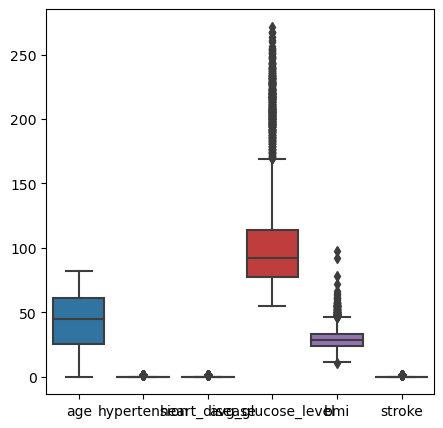

In [19]:
sns.boxplot(df)

# Label Encoding

In [21]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [25]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# train test split

In [27]:
X = df.drop('stroke',axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [28]:
Y = df['stroke']

In [29]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [31]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [32]:
Y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: int64

In [33]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [34]:
Y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: stroke, Length: 1022, dtype: int64

# Normalization

In [36]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [38]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [39]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

In [40]:
X_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ..., -0.12678509,
         1.38727506,  1.51158251],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.35586361,
         0.12078063, -1.28365994],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -0.83414241,
         0.00238781, -0.35191245],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ..., -1.08555387,
         1.17836876,  0.57983503],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.66056457,
         0.32968693, -0.35191245],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.75962556,
        -1.31545016, -1.28365994]])

# Model Training 

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [42]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [43]:
dt.feature_importances_

array([0.03373002, 0.16068938, 0.02400767, 0.0255651 , 0.02576991,
       0.03976573, 0.05061516, 0.32134065, 0.2655775 , 0.05293889])

In [44]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [45]:
Y_pred_dt = dt.predict(X_test_std)

In [46]:
Y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
ac_dt = accuracy_score(Y_test, Y_pred_dt)

In [48]:
ac_dt

0.9070450097847358

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [50]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [51]:
Y_pred_lr = lr.predict(X_test_std)

In [52]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
ac_lr = accuracy_score(Y_test, Y_pred_lr)
ac_lr

0.9383561643835616

# K Nearest Neighbor

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [56]:
Y_pred_knn = knn.predict(X_test_std)
Y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
ac_knn = accuracy_score(Y_test,Y_pred_knn)
ac_knn

0.9344422700587084

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [59]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [60]:
Y_pred_rf = rf.predict(X_test_std)
Y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
ac_rf = accuracy_score(Y_test,Y_pred_rf)
ac_rf

0.9373776908023483

# Support Vector Machine

In [63]:
from sklearn.svm import SVC

In [64]:
svm = SVC()

In [65]:
svm.fit(X_train_std,Y_train)

SVC()

In [66]:
Y_pred_svm = svm.predict(X_test_std)
Y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
ac_svm = accuracy_score(Y_test,Y_pred_svm)
ac_svm

0.9393346379647749

In [68]:
ac_dt

0.9070450097847358

In [69]:
ac_knn

0.9344422700587084

In [70]:
ac_lr

0.9383561643835616

In [95]:
ac_rf

0.9373776908023483

# Accuracy Score Comparisons 

<Axes: >

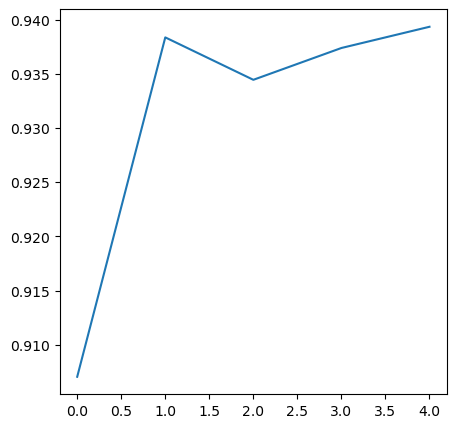

In [89]:
sns.lineplot((ac_dt,ac_lr,ac_knn,ac_rf,ac_svm))

([<matplotlib.axis.YTick at 0x298f1835c50>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

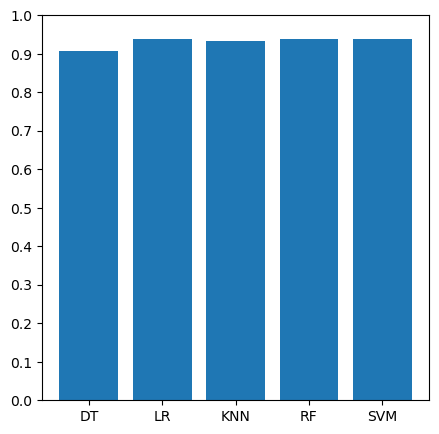

In [94]:
plt.bar(['DT', 'LR', 'KNN', 'RF', 'SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_svm])
plt.xlabel = ["Algorithms"]
plt.ylabel = ["Accuracy Score"]
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Model Evaluation

In [101]:
from sklearn.svm import SVC

In [102]:
model = SVC()

In [104]:
model.fit(X_train_std,Y_train)

SVC()

In [105]:
Y_train_pred = model.predict(X_train_std)
training_data_accuracy = accuracy_score(Y_train_pred,Y_train)
training_data_accuracy

0.9547455968688845

In [106]:
Y_test_pred = model.predict(X_test_std)
test_data_accuracy = accuracy_score(Y_test_pred,Y_test)
test_data_accuracy

0.9393346379647749

# predictive System

In [152]:
input_data = (1,67,0,0,1,3,0,100.21,28.9,2)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have stroke')
else:
  print('The person have stroke')

[0]
The person does not have stroke


# saving the trained model

In [153]:
import pickle
filename = 'stroke_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [154]:
# loading the saved model
loaded_model = pickle.load(open('stroke_model.sav', 'rb'))